In [25]:
import pandas as pd
import numpy as np
import re
import time
import requests as rq
import bs4 as bs4
from utils import *

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier

pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)

pd.set_option('max_columns', 28)

### Question : What if I build the model using only the price, and the model year ? Would I have a good model?

I will build a very simple decision tree model with only two variables in order to see if the algorithm can find information regarding my choice patterns.

In [2]:
df = pd.read_csv('car_information.csv',index_col=0)
# Select labeled rows
df = df[df['Y'].notnull()]
df.head(1)

,link,brand,price,cartype,model,gearbox,regdate,mileage,motorpower,fuel,car_steering,carcolor,exchange,version,doors,financial,extra,Y
0,https://rj.olx.com.br/rio-de-janeiro-e-regiao/autos-e-pecas/carros-vans-e-utilitarios/link_ford-ka-hatch-2018-unico-dono-completao-gnv-gratis-ent-8mil-48x-751-00-fixas-no-cdc-686667352,ford,31900,hatch,ka,manual,2015,39869,1,flex,elétrica,preto,sim,ka 1.0 se se plus tivct flex 5p,4 portas,ipva pago,"vidro elétrico, air bag, trava elétrica, ar condicionado, direção hidráulica, alarme, som, sensor de ré",1.0


In [3]:
df = clean_df(df)
df.head(1)

,link,price,regdate,mileage,version,doors,Y,vidro elétrico,air bag,trava elétrica,ar condicionado,direção hidráulica,alarme,som,...,carcolor_branco,carcolor_prata,carcolor_preto,carcolor_0,carcolor_vermelho,carcolor_cinza,carcolor_azul,carcolor_outra,carcolor_laranja,carcolor_amarelo,carcolor_verde,exchange_sim,exchange_não,exchange_0
0,https://rj.olx.com.br/rio-de-janeiro-e-regiao/autos-e-pecas/carros-vans-e-utilitarios/link_ford-ka-hatch-2018-unico-dono-completao-gnv-gratis-ent-8mil-48x-751-00-fixas-no-cdc-686667352,31900,2015,39869,ka 1.0 se se plus tivct flex 5p,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [4]:
df.columns
    

Index(['link', 'price', 'regdate', 'mileage', 'version', 'doors', 'Y',
       'vidro elétrico', 'air bag', 'trava elétrica', 'ar condicionado',
       'direção hidráulica', 'alarme', 'som', 'sensor de ré', 'blindado',
       'c mera de ré', 'financial_ipva pago', 'financial_0',
       'financial_financiado', 'financial_de leilão', 'financial_com multas',
       'brand_ford', 'brand_vwvolkswagen', 'cartype_hatch', 'cartype_passeio',
       'cartype_sedã', 'cartype_0', 'cartype_suv', 'cartype_pickup',
       'model_ka', 'model_ecosport', 'model_fiesta', 'model_fox',
       'model_focus', 'model_gol', 'model_voyage', 'model_up', 'model_saveiro',
       'model_crossfox', 'model_jetta', 'model_golf', 'model_polo',
       'model_fusion', 'model_0', 'model_ranger', 'gearbox_manual',
       'gearbox_automático', 'gearbox_semiautomático', 'gearbox_0',
       'motorpower_1.6', 'motorpower_1', 'motorpower_0', 'motorpower_2.02.9',
       'motorpower_1.5', 'motorpower_1.4', 'fuel_flex',
       'car

In [6]:
cols = ['price','regdate', 'Y']

In [7]:
# shuffle dataframe
df = shuffle(df).reset_index(drop=True)

In [8]:
simple_df = df[cols]
simple_df.head(2)

,price,regdate,Y
0,26000,2015,1.0
1,45899,2015,0.0


In [9]:
Y = simple_df['Y']
X = simple_df.loc[:, 'price':'regdate']

In [10]:
# Split train and validation data
Xtrain, Xval, y_train, y_val = train_test_split(X, Y, test_size=0.5, random_state=42)
Xtrain.shape, Xval.shape, y_train.shape, y_val.shape

((2159, 2), (2160, 2), (2159,), (2160,))

### - Model 

- we have to account for inbalance data 


In [11]:
y_train.mean()

0.14219546086150997

In [12]:
model = DecisionTreeClassifier(random_state= 42, max_depth = 2 , class_weight= 'balanced')
model.fit(Xtrain,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [13]:
pred = model.predict_log_proba(Xval)[:,1]

### -  Metrics

In [14]:
from sklearn.metrics import roc_auc_score, average_precision_score

In [15]:
print('average_precision_score :', np.round(average_precision_score(y_val, pred),4))
print('roc_auc_score :', np.round(roc_auc_score(y_val, pred),4))

average_precision_score : 0.4661
roc_auc_score : 0.8978


### - Decision Tree

In [18]:
from sklearn.tree import plot_tree
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


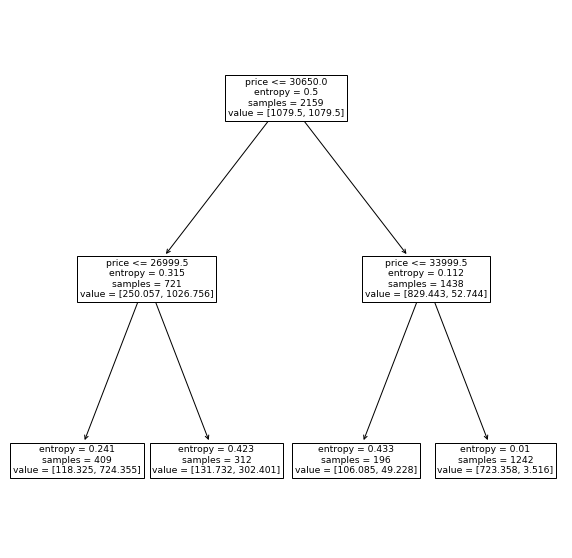

In [17]:
fig,ax = pylab.subplots(1,1, figsize = (10,10))
plot_tree(model , ax = ax, feature_names = Xtrain.columns);

This is very simple model but I want to understand and see if the algorithm is doing do in terms of what I really want to buy or at least see pictures. It seens that this simple model kind of represents a bit what I am looking for. First, the start note split the data into two groups ( price greater than 30650 and price lower than this value). This seems realistic for me because the value is within the range of price I want. Second, the split node on the left side splits the data into two more groups ( price lower than 26999.5 and price greater than this value). Interesting to see that if the price is lower than this threshold, I am more likely to check the pictures of the car. How do I know that? Simple, we check the value and calculate the positive score. In this case 724.355  / (724.355 + 118.325) = 0.85. This means that there I am more likely to take a look at the car with a price below 26999.5. We can also do this analysis for the right side of the start node but at first glance I like what the model is telling me. 